### Exploration of K through 8th grade Aspire students competency change in Math
#### By Ron Bjork (as part of my application to Analytics Engineer at Aspire)

General approach was to look at distributions, determine if it is  normal like using graphical proceedure then analytical.  Then apply Null Hypothesis to see if mean difference between 2016-2017 year and 2017-2018 year is significant enough is assume due to some deterministic structural change in method of environment rather than some unconsidered changing random effect perturbing the mean from one year to the next. But we'll also consider changes in student body in the third notebook, "Effect of Student Body Change".  In this notebook, we apply the "Null Hypothesis" using the t-test to see if the performance change is enough to be statistically significant.  In the second notebook, "Student Grades Most Effected", we compare grades in terms of mean score changes between school years, and we observer whether the gaussian distribution of scores can be assumed - something that generally our analytica methods assume.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('HWAssignment_Dataset.csv')

In [4]:
df.shape, list(df.columns)

((31983, 14),
 ['SchoolYear',
  'Hashed_StudentNumber',
  'Student_Grade_Level',
  'School',
  'Region',
  'AssessmentType',
  'AssessmentSubject',
  'AssessmentName',
  'Student_Ethnicity',
  'Student_is_FreeOrReducedLunch',
  'Language_Fluency',
  'Student_is_SPED',
  'ProficiencyLevelScore',
  'PercentScore'])

In [5]:
df[['SchoolYear',
  'Student_Grade_Level',
  'School',
  'Region',
  'AssessmentType',
  'AssessmentSubject',
  'AssessmentName',
  'Student_Ethnicity',
  'Student_is_FreeOrReducedLunch',
  'Language_Fluency',
  'Student_is_SPED',
  'ProficiencyLevelScore',
  'PercentScore',
  'Hashed_StudentNumber']].head(3)

,SchoolYear,Student_Grade_Level,School,Region,AssessmentType,AssessmentSubject,AssessmentName,Student_Ethnicity,Student_is_FreeOrReducedLunch,Language_Fluency,Student_is_SPED,ProficiencyLevelScore,PercentScore,Hashed_StudentNumber
0,2016-2017,04,SCA,Central Valley,ICA,ELA,Aspire Public Schools Grade 4 ELA SBAC ICA - S...,Hispanic,N,English Only,N,3,0.5882,0xAA51CA34A2D1DAEE229F894F4FC608AC
1,2016-2017,04,SCA,Central Valley,ICA,Math,Aspire Public Schools Grade 4 Math SBAC ICA - ...,Hispanic,N,English Only,N,2,0.5161,0xAA51CA34A2D1DAEE229F894F4FC608AC
2,2017-2018,07,GSP,Bay Area,ICA,ELA,Aspire Public Schools Grade 7 ELA SBAC ICA - S...,Hispanic,Y,English Learner,N,1,0.1961,0x8BD65B6B32B697518B347E8E8A3E8CBB


### Filtering for K8 Math Students

In [6]:
df['Student_Grade_Level'].unique()

array(['04', '07', '06', '05', '11', '12', '03', '08', '10', 'PK'],
      dtype=object)

In [7]:
dfK8 = df.loc[df['Student_Grade_Level'].isin((['03','04', '05', '07', '06', '08']))]
dfK8['Student_Grade_Level'].unique()

array(['04', '07', '06', '05', '03', '08'], dtype=object)

In [8]:
dfK8Math = dfK8.loc[df['AssessmentSubject'] == 'Math']
print("Sample size:",dfK8Math.shape[0])

Sample size: 14662


### Types of Assessments

In [9]:

dfK8Math['AssessmentType'].unique()

array(['ICA'], dtype=object)

Just one, ICA

### Looking at Distributions

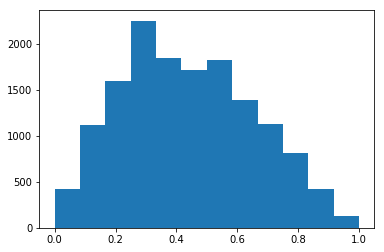

In [10]:

res = plt.hist(dfK8Math['PercentScore'],bins=12)


Appears Normal

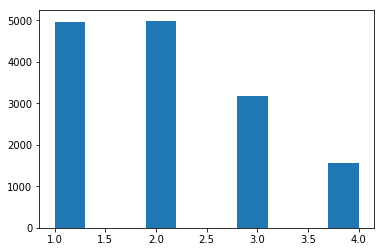

In [11]:
res = plt.hist(dfK8Math['ProficiencyLevelScore'])


Clearly not usefull for Normal Distribution fitting

### Assuming Normal Distribution, Math Assesment Score Stats for K8 

In [12]:
schoolscorestatics = dfK8Math.groupby(['SchoolYear'])['PercentScore'].agg(['count','mean','var'])
schoolscorestatics

,count,mean,var
SchoolYear,,,
2016-2017,7181,0.420222,0.044306
2017-2018,7481,0.452274,0.048219


In [13]:
dfK8Math2016_12017 = dfK8Math.loc[dfK8Math['SchoolYear'] == '2016-2017']
dfK8Math2016_12017.shape

(7181, 14)

In [14]:
dfK8Math2017_12018 = dfK8Math.loc[dfK8Math['SchoolYear'] == '2017-2018']
dfK8Math2017_12018.shape

(7481, 14)

data rows column count (7181, 14)
mean 0.4202215708118719
fitted scaler, mean, sigma = 822.9053254212326 0.35740869642751205 0.2485793157565146


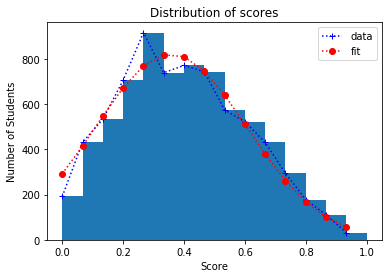

In [19]:
import math
print("data rows column count",dfK8Math2016_12017.shape)
print("mean",dfK8Math2016_12017['PercentScore'].mean())

mean = dfK8Math2016_12017['PercentScore'].mean()
sigma = math.sqrt(dfK8Math2016_12017['PercentScore'].var())

def gaus(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))


res = plt.hist(dfK8Math2016_12017['PercentScore'],bins=15)

y = res[0]
x = res[1][0:len(y)]

popt,pcov = curve_fit(gaus,x,y,p0=[1,mean,sigma])

print("fitted scaler, mean, sigma =",*popt)

plt.plot(x,y,'b+:',label='data')
plt.plot(x,gaus(x,*popt),'ro:',label='fit')

plt.legend()
plt.title('Distribution of scores')
plt.xlabel('Score')
plt.ylabel('Number of Students')

plt.show()

mean 0.45227429488036824 sigma 0.21958792892065224
fitted scaler, mean, sigma = 807.1928187221381 0.3957555921597003 0.26593525651625366


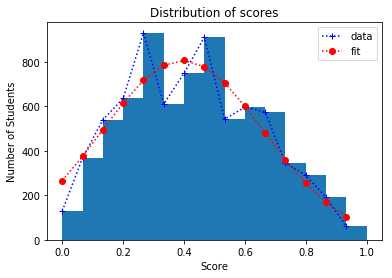

In [20]:

mean = dfK8Math2017_12018['PercentScore'].mean()
sigma = math.sqrt(dfK8Math2017_12018['PercentScore'].var())

print("mean",mean,"sigma",sigma)

res = plt.hist(dfK8Math2017_12018['PercentScore'],bins=15)
y = res[0]
x = res[1][0:len(y)]

popt,pcov = curve_fit(gaus,x,y,p0=[1,mean,sigma])

print("fitted scaler, mean, sigma =",*popt)

plt.plot(x,y,'b+:',label='data')
plt.plot(x,gaus(x,*popt),'ro:',label='fit')

plt.legend()
plt.title('Distribution of scores')
plt.xlabel('Score')
plt.ylabel('Number of Students')

plt.show()

The distributions appear basically normal(of course no score can be below zero as is possible on a normal curve).  The "68-95-99.7" could also be used to see how well the data fits the normal distribution assumption.

### Checking Against the 68-95-99.5 Rule

In [29]:
df68 = dfK8Math2017_12018.loc[(dfK8Math2017_12018['PercentScore'] > (mean - sigma)) & \
                       (dfK8Math2017_12018['PercentScore'] < (mean + sigma))]

df95 = dfK8Math2017_12018.loc[(dfK8Math2017_12018['PercentScore'] > (mean - 2.0*sigma)) & \
                       (dfK8Math2017_12018['PercentScore'] < (mean + 2.0*sigma))]

df995 = dfK8Math2017_12018.loc[(dfK8Math2017_12018['PercentScore'] > (mean - 3.0*sigma)) & \
                       (dfK8Math2017_12018['PercentScore'] < (mean + 3.0*sigma))]


rule68 = df68.shape[0]/dfK8Math2017_12018.shape[0]
rule95 = df95.shape[0]/dfK8Math2017_12018.shape[0]
rule995 = df995.shape[0]/dfK8Math2017_12018.shape[0]

print("( 68 vs",rule68,")  ( 95 vs",rule95, ") ( 99.5  vs", rule995, ")")

( 68 vs 0.6341398208795616 )  ( 95 vs 0.9712605266675578 ) ( 99.5  vs 1.0 )


Close but not entirely conclusive.  Broad shorlders and rapid falloff at the tails

### Applying the NULL Hypothesis Tests

Using T Test to assess likelyhood of change in mean scores measured represents actual change in achievement 

In [54]:
print("Not reliable due to distribution")
stats.ttest_ind(dfK8Math2016_12017['ProficiencyLevelScore'], dfK8Math2017_12018['ProficiencyLevelScore'])

Not reliable due to distribution


Ttest_indResult(statistic=-9.934947773343403, pvalue=3.472455395401406e-23)

In [55]:
print("Better stat")
stats.ttest_ind(dfK8Math2016_12017['PercentScore'], dfK8Math2017_12018['PercentScore'])

Better stat


Ttest_indResult(statistic=-9.016506610223155, pvalue=2.1785796240257726e-19)

### Conclusion

Since the p-value is low, we can safely assume theres been a change in students performance on testsand that they are not simply a random pertubations of other effects and insufficient sample size. Here being a student in effect serving as a test sample against school methodology and resources.  But there could be other confounding variables that have caused the change in the scores.  A better statistical approach may be to have used a random selection of schools for testing a the effect of a proposed change in  instructional resource and methodogy.